In [2]:
import pandas as pd
df=pd.read_csv("C:\\Users\conta\\Downloads\\archive (4)\\data.csv",encoding='latin')
df

<>:2: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
<>:2: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
C:\Users\conta\AppData\Local\Temp\ipykernel_21764\2959888179.py:2: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
  df=pd.read_csv("C:\\Users\conta\\Downloads\\archive (4)\\data.csv",encoding='latin')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df.Description
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

**To make coding easier and more consistent,we rename the original camel-case columns to snake_case

In [5]:
df=df.rename(columns={'InvoiceNo':'invoice_no',
                      'StockCode':'stock_code',
                      'InvoiceDate':'invoice_date',
                      'UnitPrice':'unit_price',
                      'CustomerID':'customer_id'})
df.head()

,invoice_no,stock_code,Description,Quantity,invoice_date,unit_price,customer_id,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


###To maintain data integrity,records with missing identifiers were removed:
**Used .dropna() focusing on the Description**
**Transactions without a customer_id or Description cannot by aaccurately attributed for cohort analysis

In [6]:
df=df.dropna(subset=['Description','customer_id'])
df

,invoice_no,stock_code,Description,Quantity,invoice_date,unit_price,customer_id,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
df=df.drop_duplicates()
df

,invoice_no,stock_code,Description,Quantity,invoice_date,unit_price,customer_id,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Data type conversion:'invoice_date
To ensure the 'invoice_date' is handled as a discrete number,we convert it from float to an integer
**Method**:Using'.loc' to ensure the assignmet happens directly on the original Dataframe and avoids warnings

In [8]:
df.loc[:,'invoice_date']=pd.to_datetime(df['invoice_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    401604 non-null  object 
 1   stock_code    401604 non-null  object 
 2   Description   401604 non-null  object 
 3   Quantity      401604 non-null  int64  
 4   invoice_date  401604 non-null  object 
 5   unit_price    401604 non-null  float64
 6   customer_id   401604 non-null  float64
 7   Country       401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


## Data type conversion:customer_id
To ensure the 'customer_id' is handled as a discrete number,we convert it from float to an integer
**Method**:Using'.loc' to ensure the assignmet happens directly on the original Dataframe and avoids warnings

In [9]:
df.loc[:,'customer_id']=df['customer_id'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    401604 non-null  object 
 1   stock_code    401604 non-null  object 
 2   Description   401604 non-null  object 
 3   Quantity      401604 non-null  int64  
 4   invoice_date  401604 non-null  object 
 5   unit_price    401604 non-null  float64
 6   customer_id   401604 non-null  float64
 7   Country       401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


### Add 'Total' column
I am adding a Total column by multiplying 'unit_price' and 'Quantity'
**Note on the error:**pandas is warning me about 'SettingWithcopy."I should update the previous cell to:
this ensures 'df' is an independent dataframe and stops the warning

In [10]:
df.loc[:,'Total']=df['unit_price']*df['Quantity']
df

C:\Users\conta\AppData\Local\Temp\ipykernel_21764\2317802494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Total']=df['unit_price']*df['Quantity']


,invoice_no,stock_code,Description,Quantity,invoice_date,unit_price,customer_id,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [11]:
cancellations=df[df['invoice_no'].str.startswith('C',na=False)]
cancellations


,invoice_no,stock_code,Description,Quantity,invoice_date,unit_price,customer_id,Country,Total
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [12]:
df=df[~df['invoice_no'].str.startswith('C',na=False)]
df

,invoice_no,stock_code,Description,Quantity,invoice_date,unit_price,customer_id,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [13]:
remaining_c=df[df['invoice_no'].str.startswith('C',na=False)]
remaining_c

,invoice_no,stock_code,Description,Quantity,invoice_date,unit_price,customer_id,Country,Total


In [13]:
df['Description']=df['Description'].str.strip()

C:\Users\conta\AppData\Local\Temp\ipykernel_21764\3824627207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description']=df['Description'].str.strip()


In [15]:
df.reset_index(drop=True)

,invoice_no,stock_code,Description,Quantity,invoice_date,unit_price,customer_id,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
392727,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
392728,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
392729,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
392730,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [16]:
df.isna().sum()

invoice_no      0
stock_code      0
Description     0
Quantity        0
invoice_date    0
unit_price      0
customer_id     0
Country         0
Total           0
dtype: int64

In [17]:
df.head()

,invoice_no,stock_code,Description,Quantity,invoice_date,unit_price,customer_id,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Top 10 Products by Revenue
To understand which items are driving the most value for business, we aggregate the total sales
amount by product
**Steps taken**
**Grouped** the data by 'Description'
**summed** the 'Total' column for each group
**sorted** in descending order to bring the highest earners to the top
**visualized** the results using a seaborn bar chart for easy comparison

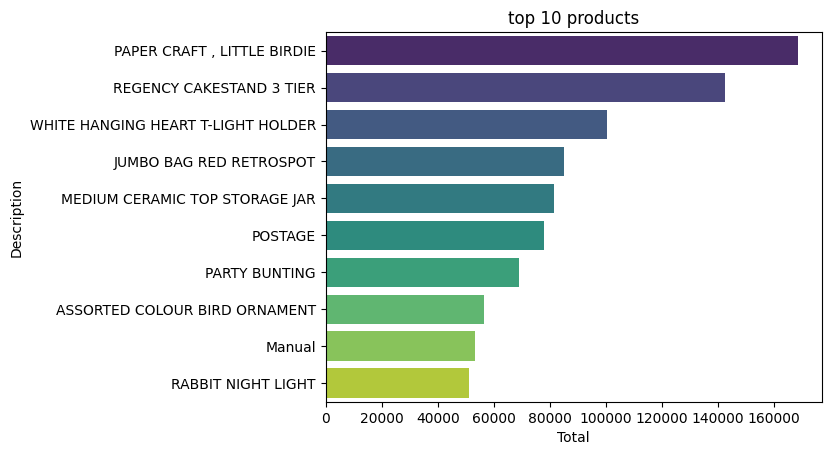

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
s=df.groupby('Description')['Total'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='Total',y='Description',data=s,palette='viridis',hue='Description')
plt.title("top 10 products")
plt.xlabel('Total')
plt.ylabel('Description')
plt.show()

## Top 10 Countries by Total Sales
This analysis identifies the primary geographical markets by calculating the total sales volume for each country
**key observation**
**Data Aggregation** The data is grouped by 'Country' and the 'Total' sales values are summed
**Sorting** Results are sorted in descending order to highlight the top 10 contributors
**Visualization** A horizontal bar plot is used to provide a clear comparison of sales accross different regions
**Insight** The United Kingdom represents the vast majority of total sale,significantly outperforming others international markets in this dataset

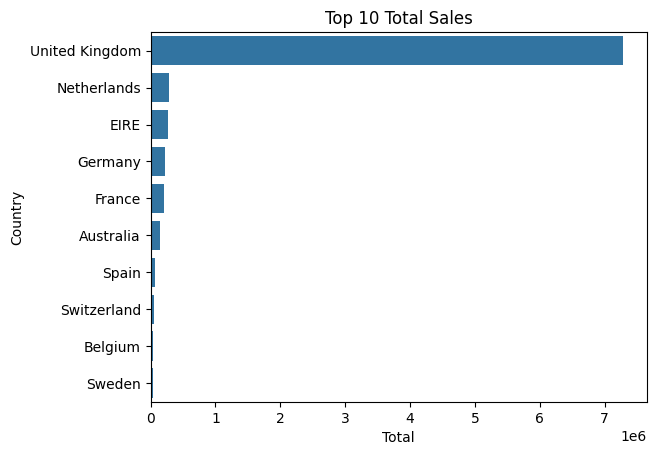

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
s=df.groupby('Country')['Total'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='Total',y='Country',data=s)
plt.title('Top 10 Total Sales')
plt.show()

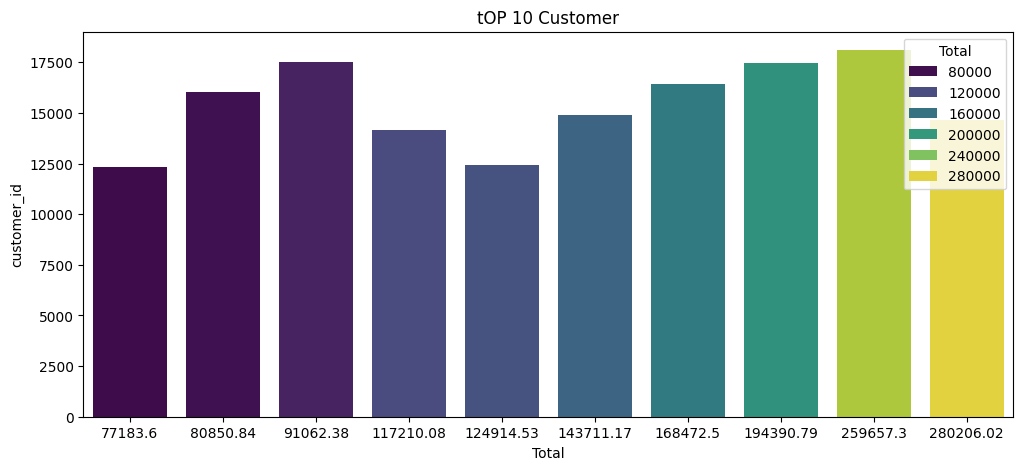

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
s=df.groupby('customer_id')['Total'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='Total',y='customer_id',data=s,hue='Total',palette='viridis')
plt.title('tOP 10 Customer')
plt.show()

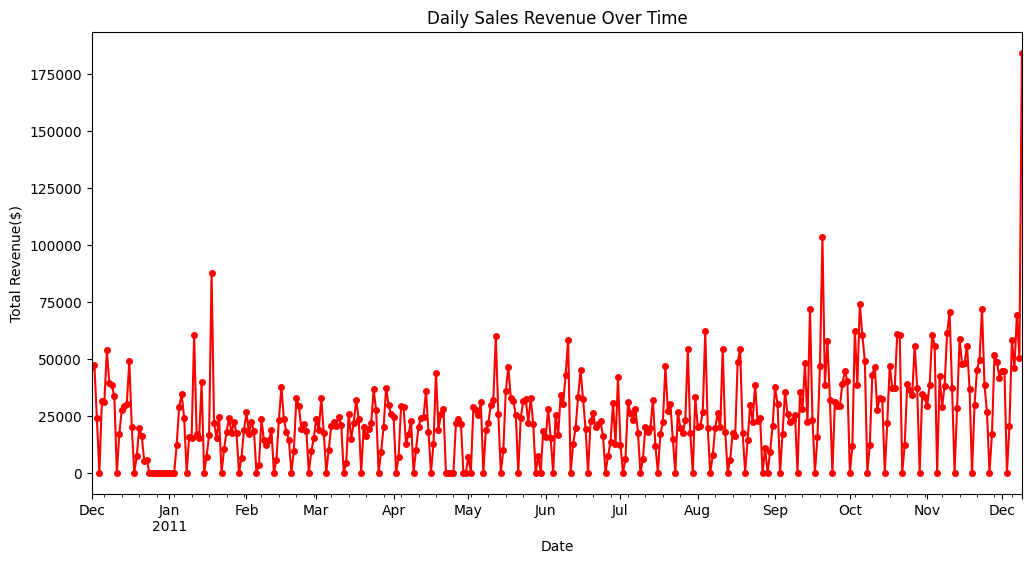

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
df_time=df.set_index('invoice_date')
daily_revenue=df_time['Total'].resample('D').sum()
plt.figure(figsize=(12,6))
daily_revenue.plot(kind='line',color='red',marker='o',markersize=4)
plt.title('Daily Sales Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue($)')
plt.show()


C:\Users\conta\AppData\Local\Temp\ipykernel_9848\3197591758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invoice_date']=pd.to_datetime(df['invoice_date'])
C:\Users\conta\AppData\Local\Temp\ipykernel_9848\3197591758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df['invoice_date'].dt.hour
C:\Users\conta\AppData\Local\Temp\ipykernel_9848\3197591758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

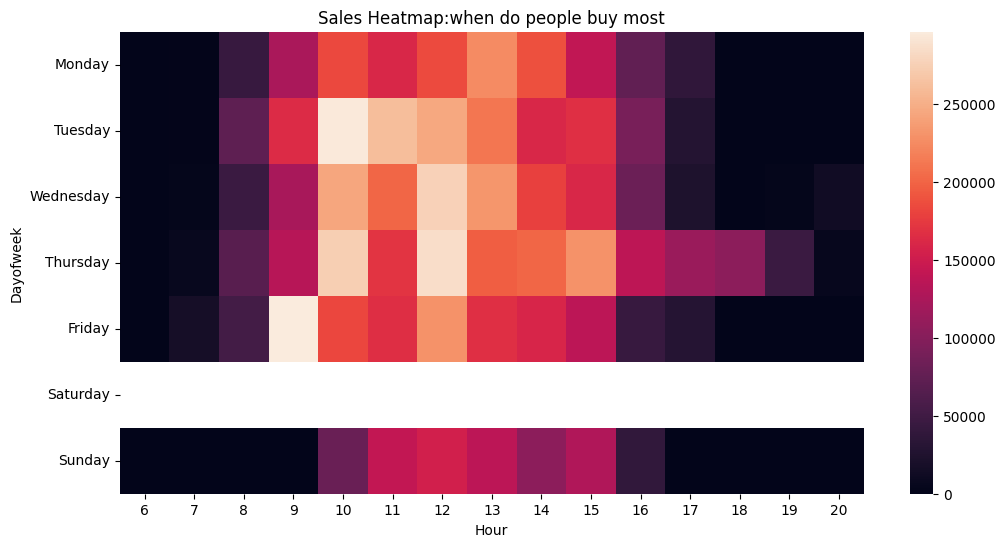

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
df['invoice_date']=pd.to_datetime(df['invoice_date'])
df['Hour']=df['invoice_date'].dt.hour
df['Dayofweek']=df['invoice_date'].dt.day_name()
df['revenue']=df['Quantity']*df['unit_price']
sales_pivot=df.pivot_table(index='Dayofweek',
                           columns='Hour',
                           values='revenue',
                           aggfunc='sum').fillna(0)
days_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sales_pivot=sales_pivot.reindex(days_order)
plt.figure(figsize=(12,6))
sns.heatmap(sales_pivot,annot=False)
plt.title("Sales Heatmap:when do people buy most")
plt.show()

C:\Users\conta\AppData\Local\Temp\ipykernel_9848\1245913954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_peak.values,y=top_products_peak.index,palette='magma_r')


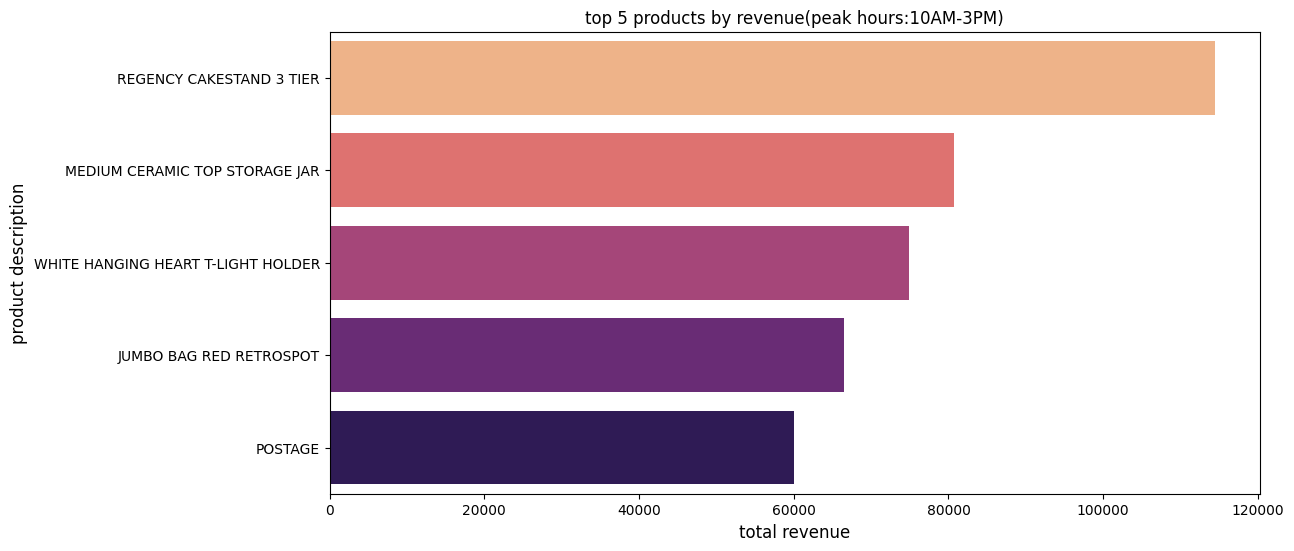

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
peak_data=df[(df['Hour']>=10) & (df['Hour']<=15)]
top_products_peak=peak_data.groupby('Description')['Total'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(12,6))
sns.barplot(x=top_products_peak.values,y=top_products_peak.index,palette='magma_r')
plt.title('top 5 products by revenue(peak hours:10AM-3PM)',fontsize=12)
plt.xlabel('total revenue',fontsize=12)
plt.ylabel('product description',fontsize=12)
plt.show()

C:\Users\conta\AppData\Local\Temp\ipykernel_21764\1510904133.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invoice_date']=pd.to_datetime(df['invoice_date'])
C:\Users\conta\AppData\Local\Temp\ipykernel_21764\1510904133.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invoice_month']=df.loc[:,'invoice_date'].dt.to_period('M').dt.to_timestamp()
C:\Users\conta\AppData\Local\Temp\ipykernel_21764\1510904133.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

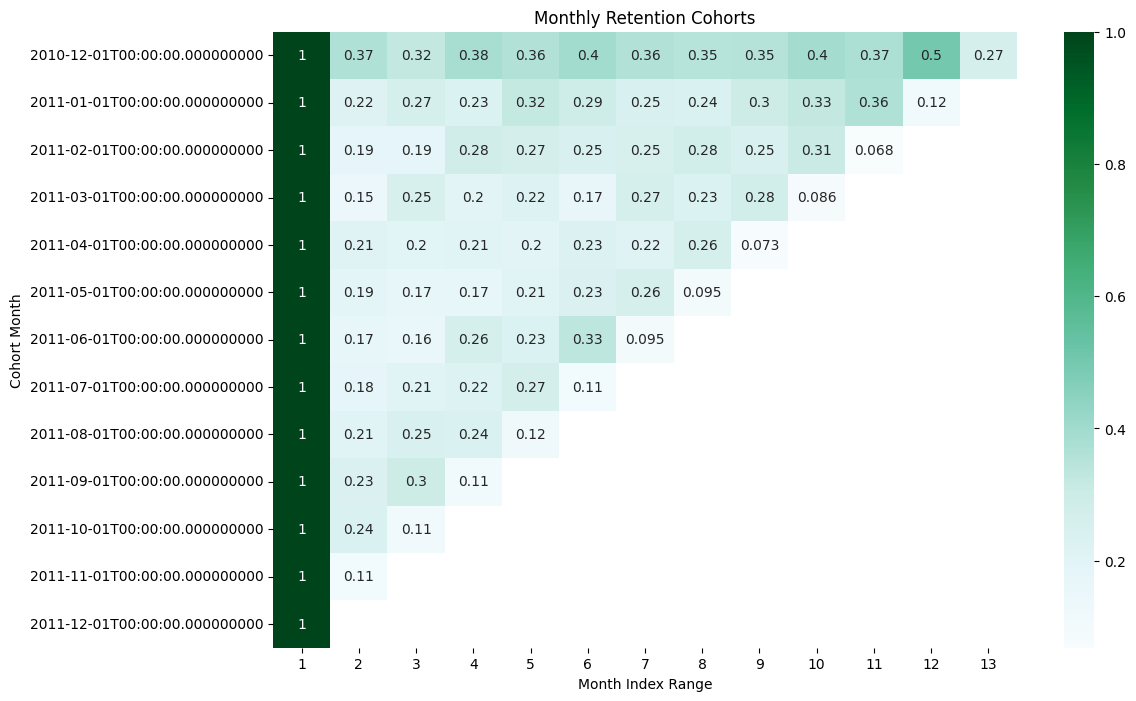

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
df['invoice_date']=pd.to_datetime(df['invoice_date'])
def get_month(x):return dt.datetime(x.year,x.month,1)
df['invoice_month']=df.loc[:,'invoice_date'].dt.to_period('M').dt.to_timestamp()
df['cohort_month']=df.groupby('customer_id')['invoice_month'].transform('min')
#Calculate Cohort index(months since first purchase)
def get_date_int(df,column):
    year= df[column].dt.year
    month=df[column].dt.month
    return year,month
inv_year,inv_month=get_date_int(df,'invoice_month')
coh_year,coh_month=get_date_int(df,'cohort_month')
df['cohort_index']=(inv_year-coh_year)*12+(inv_month-coh_month)+1
#pivot for heatmap
cohort_data=df.groupby(['cohort_month','cohort_index'])['customer_id'].nunique().reset_index()
retention_matrix=cohort_data.pivot(index='cohort_month',columns='cohort_index',values='customer_id')
cohort_sizes=retention_matrix.iloc[:,0]
retention=retention_matrix.divide(cohort_sizes,axis=0)
#plot
plt.figure(figsize=(12,8))
sns.heatmap(retention,annot=True,cmap='BuGn')
plt.title('Monthly Retention Cohorts')
plt.xlabel('Month Index Range')
plt.ylabel('Cohort Month')
plt.show()

In [16]:
df.to_csv("cleaned_ecommerce_data.csv",index=False)